# Extention of notebook 1


In [6]:
# imported libraries
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fftpack import dct
import math

from scipy.stats import multivariate_normal


In [7]:

# load data
Tdata = scipy.io.loadmat('Data/TrainingSamplesDCT_8_new.mat')
TrainsampleDCT_FG = Tdata['TrainsampleDCT_FG']
TrainsampleDCT_BG = Tdata['TrainsampleDCT_BG']

print('DCT_FG: ', TrainsampleDCT_FG.shape)
print('DCT_BG: ', TrainsampleDCT_BG.shape)

# load bmp images
# cheetah = scipy.io.loadmat('Data/im_double.mat')['img']
# cheetah = np.array(cheetah, dtype=np.float64)
cheetah = Image.open('Data/cheetah.bmp')
cheetah = np.array(cheetah, dtype=np.float64)

cheetah_mask = Image.open('Data/cheetah_mask.bmp')
cheetah_mask = np.array(cheetah_mask, dtype=np.float64)
cheetah_mask = cheetah_mask / 255

print(np.max(cheetah_mask))
print(np.max(cheetah))
print('cheetah image shape: ', cheetah.shape)
print('cheetah mask shape: ', cheetah_mask.shape)

# sig-zag pattern
sig_pattern = [
    [0, 1, 5, 6, 14, 15, 27, 28],
    [2, 4, 7, 13, 16, 26, 29, 42],
    [3, 8, 12, 17, 25, 30, 41, 43],
    [9, 11, 18, 24, 31, 40, 44, 53],
    [10, 19, 23, 32, 39, 45, 52, 54],
    [20, 22, 33, 38, 46, 51, 55, 60],
    [21, 34, 37, 47, 50, 56, 59, 61],
    [35, 36, 48, 49, 57, 58, 62, 63]
]


DCT_FG:  (250, 64)
DCT_BG:  (1053, 64)
1.0
149.0
cheetah image shape:  (255, 270)
cheetah mask shape:  (255, 270)



a) Using the training data in TrainingSamplesDCT 8.mat compute the histogram estimate of the prior
PY (i),i ∈{cheetah,grass}. Using the results of problem 2 compute the maximum likelihood estimate
for the prior probabilities. Compare the result with the estimates that you obtained last week. If they
are the same, interpret what you did last week. If they are different, explain the differences.
### Solution 
Given the solution to problem 2 being P(i) = ci/N we can apply this to our binomial distributed class with ci being the number of cheetah samples and N being the total number of samples. This results in the same solution for the priors as HW 1 

In [8]:
# Calculate the prior probabilities of cheetah and grass
Pcheetah = TrainsampleDCT_FG.shape[0]/ (TrainsampleDCT_FG.shape[0] + TrainsampleDCT_BG.shape[0])
Pgrass = 1-Pcheetah 

# Print the prior probabilities
print('P(cheetah) = ', Pcheetah)
print('P(grass) = ', Pgrass)

P(cheetah) =  0.1918649270913277
P(grass) =  0.8081350729086723


b) Using the training data in TrainingSamplesDCT 8.mat, compute the maximum likelihood estimates
for the parameters of the class conditional densities PX|Y (x|cheetah) and PX|Y (x|grass) under the
Gaussian assumption. Denoting by X = {X1,...,X64} the vector of DCT coefficients, create 64 plots
with the marginal densities for the two classes - PXk|Y (xk|cheetah) and PXk|Y (xk|grass),k = 1,...,64
on each. Use different line styles for each marginal. Select, by visual inspection, what you think are
the best 8 features for classification purposes and what you think are the worst 8 features (you can use
the subplot command to compare several plots at a time). Hand in the plots of the marginal densities
for the best-8 and worst-8 features (once again you can use subplot, this should not require more than
two sheets of paper). In each subplot indicate the feature that it refers to.

### Solution methodology
To visually pick the best 8 features I chose graphs that had the greatest diffrence in variance and or mean.

In [9]:
# Calculate the mean of cheetah and grass
mu_FG = np.sum(TrainsampleDCT_FG, axis=0) / TrainsampleDCT_FG.shape[0]
mu_BG = np.sum(TrainsampleDCT_BG, axis=0) / TrainsampleDCT_BG.shape[0]

mu_BG = np.reshape(mu_BG, (1, 64))
mu_FG = np.reshape(mu_FG, (1, 64))


print('mu_FG: ', mu_FG.shape)
print('mu_BG: ', mu_BG.shape)

# Calculate the covariance matrix of cheetah and grass
cov_FG = (TrainsampleDCT_FG - mu_FG).T@(TrainsampleDCT_FG - mu_FG) / TrainsampleDCT_FG.shape[0]
cov_BG = (TrainsampleDCT_BG - mu_BG).T@(TrainsampleDCT_BG - mu_BG) / TrainsampleDCT_BG.shape[0]

print('cov_FG: ', cov_FG.shape)
print('cov_BG: ', cov_BG.shape)


mu_FG:  (1, 64)
mu_BG:  (1, 64)
cov_FG:  (64, 64)
cov_BG:  (64, 64)


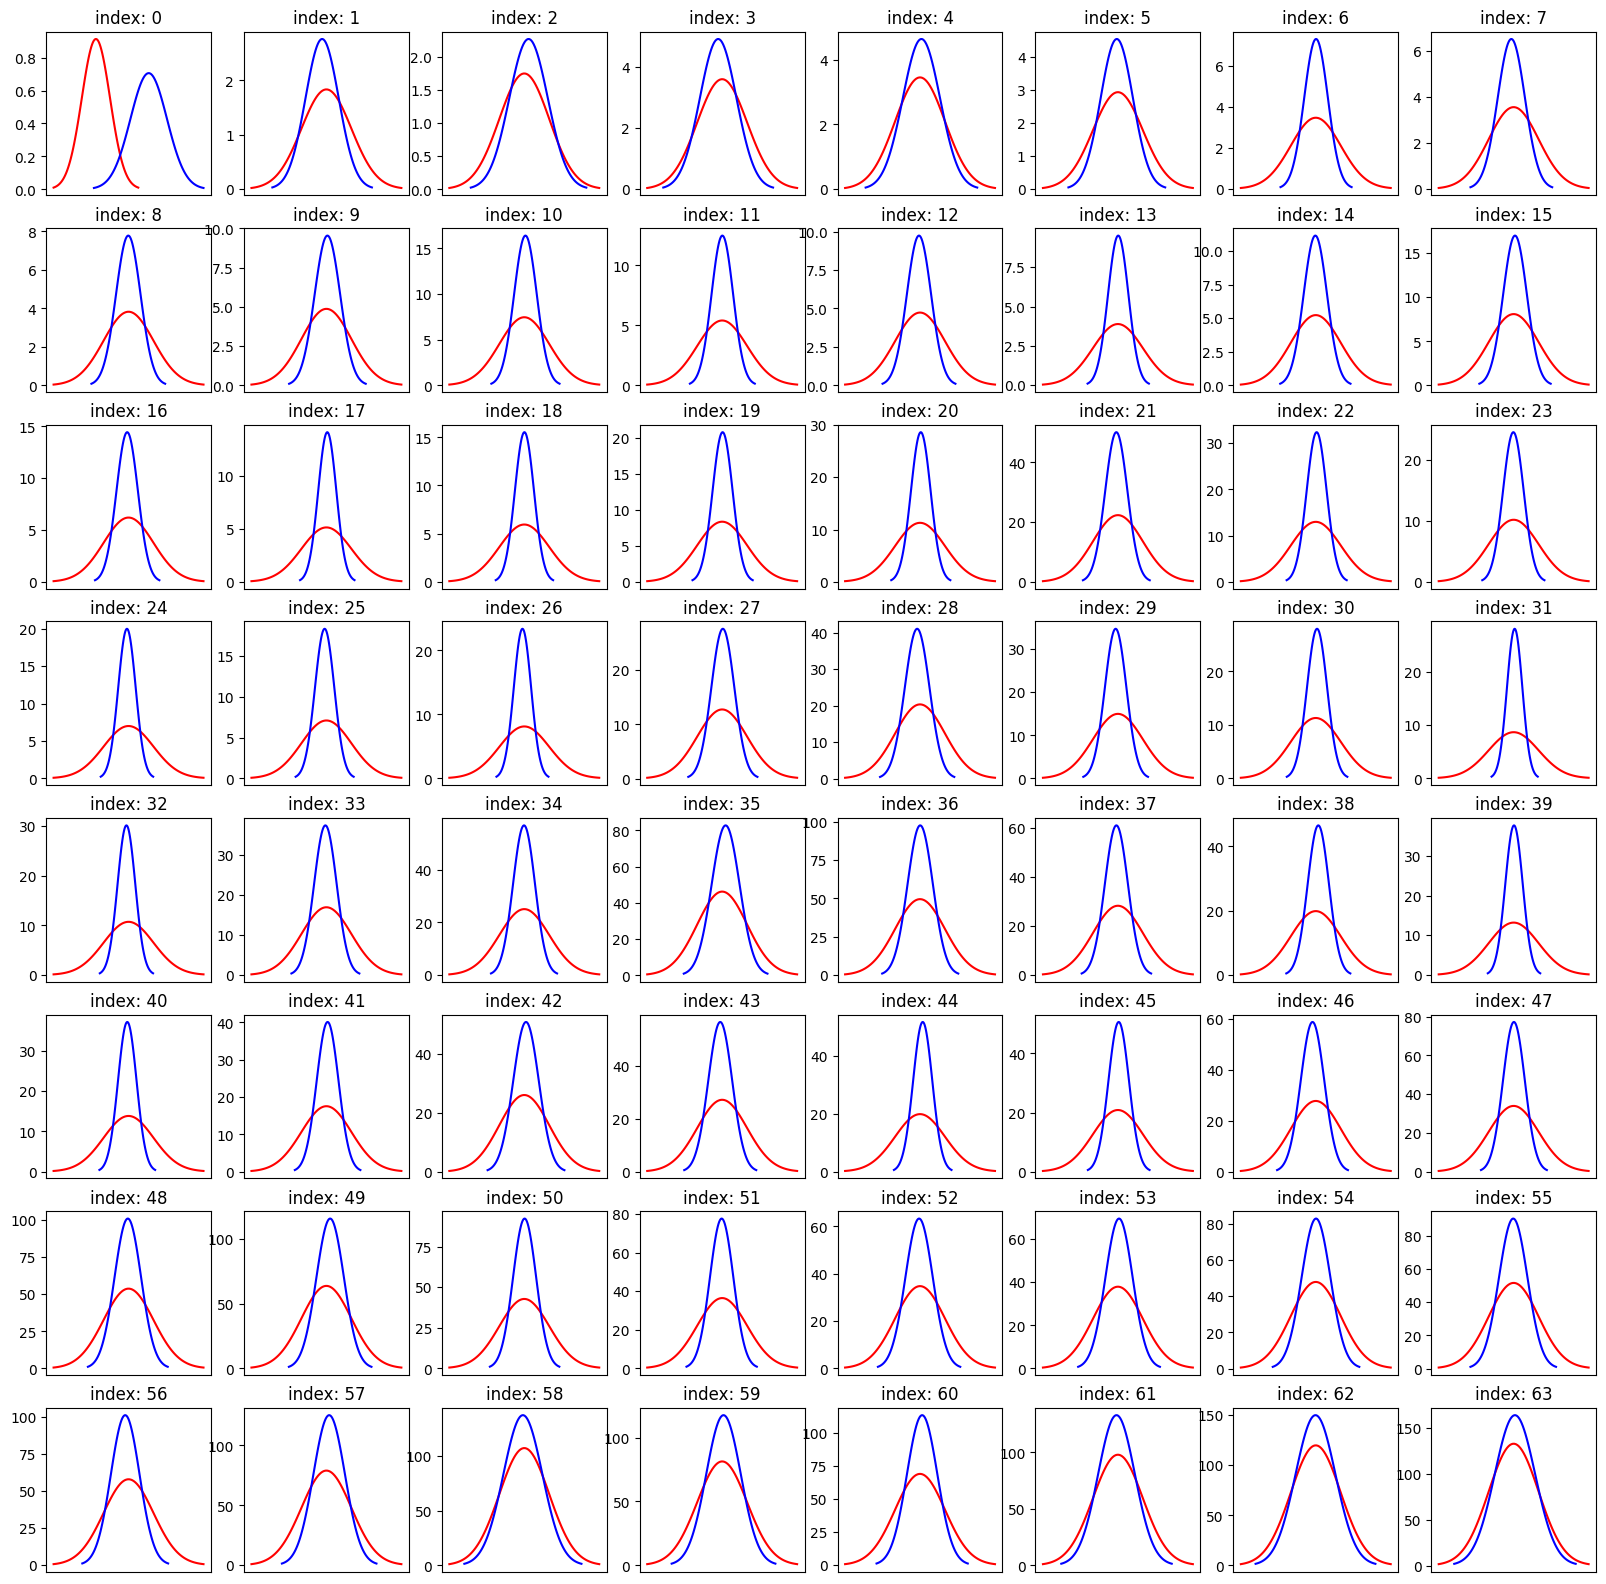

In [10]:

## Plot each of the resulting 64 guassian distributions 
fig, ax = plt.subplots(8, 8, figsize=(20, 20))
index = 0
for i in range(8):
    for j in range(8):

        x_BG = np.linspace(mu_BG[0][index] -3*np.sqrt(cov_BG[index][index]), mu_BG[0][index] + 3*np.sqrt(cov_BG[index][index]), 100)
        x_FG = np.linspace(mu_FG[0][index] -3*np.sqrt(cov_FG[index][index]), mu_FG[0][index] + 3*np.sqrt(cov_FG[index][index]), 100)

        ax[i, j].set_title('index: {}'.format(index))
        ax[i, j].set_xticks([])
        ax[i, j].plot(x_FG, multivariate_normal.pdf(x_FG, mean=mu_FG[0][index], cov=cov_FG[index][index]), color='r')
        ax[i, j].plot(x_BG, multivariate_normal.pdf(x_BG, mean=mu_BG[0][index], cov=cov_BG[index][index]), color='b')
        index += 1
plt.show()


### Best 8 features

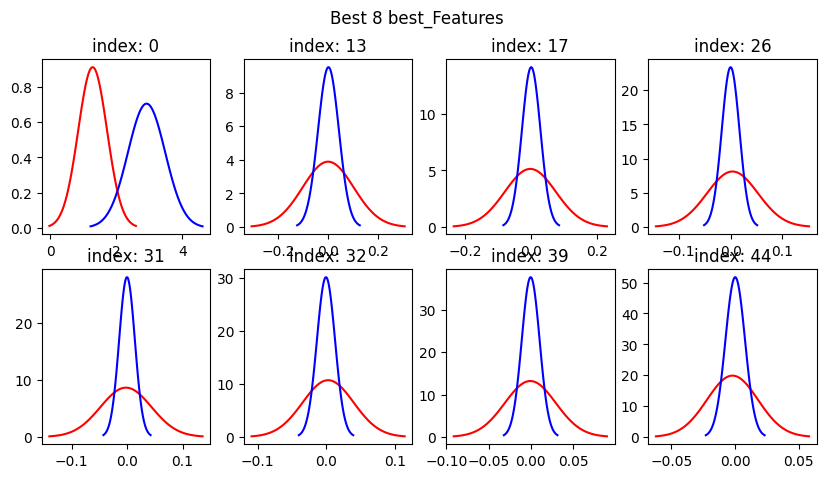

In [11]:

best_f = [0,13,17,26,31,32,39,44]

# plot only the best 8 best_features
fig, ax = plt.subplots(2, 4, figsize=(10, 5))
index = 0
for i in range(2):
    for j in range(4):

        x_BG = np.linspace(mu_BG[0][best_f[index]] -3*np.sqrt(cov_BG[best_f[index]][best_f[index]]), mu_BG[0][best_f[index]] + 3*np.sqrt(cov_BG[best_f[index]][best_f[index]]), 100)
        x_best_FG = np.linspace(mu_FG[0][best_f[index]] -3*np.sqrt(cov_FG[best_f[index]][best_f[index]]), mu_FG[0][best_f[index]] + 3*np.sqrt(cov_FG[best_f[index]][best_f[index]]), 100)

        ax[i, j].set_title('index: {}'.format(best_f[index]))
        ax[i, j].plot(x_best_FG, multivariate_normal.pdf(x_best_FG, mean=mu_FG[0][best_f[index]], cov=cov_FG[best_f[index]][best_f[index]]), color='r')
        ax[i, j].plot(x_BG, multivariate_normal.pdf(x_BG, mean=mu_BG[0][best_f[index]], cov=cov_BG[best_f[index]][best_f[index]]), color='b')
        index += 1
fig.suptitle('Best 8 best_Features')
plt.show()



### Worst 8 features


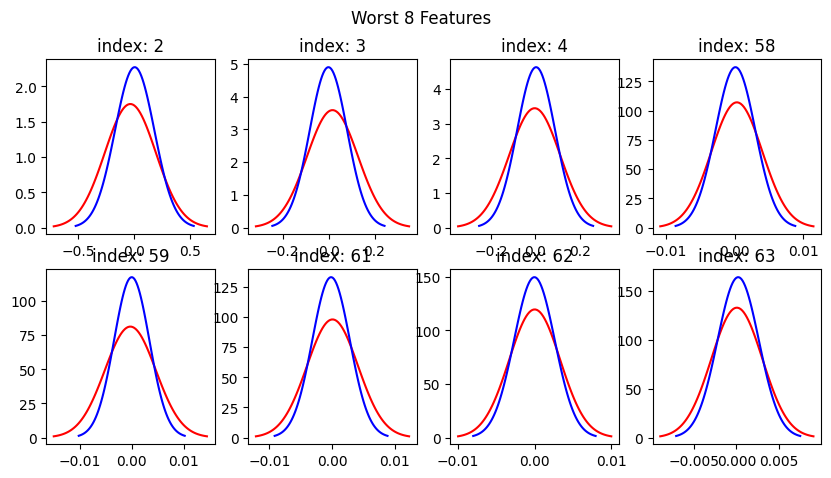

In [12]:

worst_f =[2,3,4,58,59,61,62,63]

fig, ax = plt.subplots(2, 4, figsize=(10, 5))
index = 0
for i in range(2):
    for j in range(4):

        x_BG = np.linspace(mu_BG[0][worst_f[index]] -3*np.sqrt(cov_BG[worst_f[index]][worst_f[index]]), mu_BG[0][worst_f[index]] + 3*np.sqrt(cov_BG[worst_f[index]][worst_f[index]]), 100)
        x_FG = np.linspace(mu_FG[0][worst_f[index]] -3*np.sqrt(cov_FG[worst_f[index]][worst_f[index]]), mu_FG[0][worst_f[index]] + 3*np.sqrt(cov_FG[worst_f[index]][worst_f[index]]), 100)

        ax[i, j].set_title('index: {}'.format(worst_f[index]))
        ax[i, j].plot(x_FG, multivariate_normal.pdf(x_FG, mean=mu_FG[0][worst_f[index]], cov=cov_FG[worst_f[index]][worst_f[index]]), color='r')
        ax[i, j].plot(x_BG, multivariate_normal.pdf(x_BG, mean=mu_BG[0][worst_f[index]], cov=cov_BG[worst_f[index]][worst_f[index]]), color='b')
        index += 1
fig.suptitle('Worst 8 Features')
plt.show()


c) Compute the Bayesian decision rule and classify the locations of the cheetah image using i) the
64-dimensional Gaussians, and ii) the 8-dimensional Gaussians associated with the best 8 features. For
the two cases, plot the classification masks and compute the probability of error by comparing with
cheetah mask.bmp. Can you explain the results?
2

i) 64 features


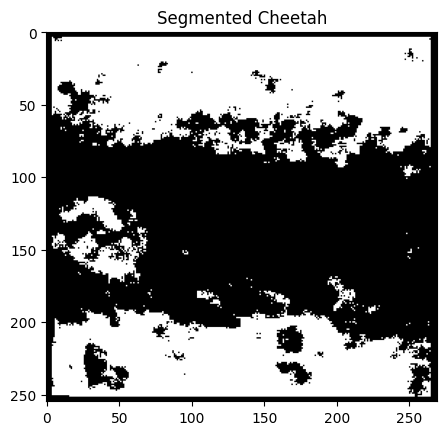

64 feature error:  0.6308351488743645


In [13]:
# Set the size of the grid to 8x8
grid_size = 8

# Set the padding size to 4
padding = 4

# Get the dimensions of the image
height, width = cheetah.shape

# Calculate the new dimensions for the padded image
padded_height = height + 2 * padding
padded_width = width + 2 * padding

# Create a new image to hold the padded image
result_img = np.random.randint(0, 1, size=(height + 2 * padding, width + 2 * padding), dtype=np.int16)

# Copy the original image into the padded image
result_img[padding:padding+height, padding:padding+width] = cheetah

# Create an empty array to hold the segmented cheetah
segmented_cheetah = np.zeros((height, width), dtype=np.float64)
inv_cov_FG = np.linalg.pinv(cov_FG)
inv_cov_BG = np.linalg.pinv(cov_BG)
det_cov_FG = np.linalg.det(cov_FG)
det_cov_BG = np.linalg.det(cov_BG)

# Define a function to calculate the outcome for a given 8x8 grid
def outcome(grid):
    # Initialize an array to hold the DCT coefficients
    dc = 64*[0]
   
    # Calculate the DCT of the grid
    dct_result = dct(dct(grid, axis=0, norm='ortho'), axis=1, norm='ortho')
    
    # Reorder the DCT coefficients using the zigzag pattern
    for row in range(8):
        for e in range(8):
            dc[sig_pattern[row][e]] = dct_result[row][e]
    
    a = np.array(dc - mu_FG, dtype = np.int64)
    b = np.array(dc - mu_BG, dtype = np.int64)

    # Calculate the log likelihood of cheetah and grass
    posterior_FG =  np.log(det_cov_FG) + (a@inv_cov_FG@(a).T)/2 - np.log(Pcheetah)
    posterior_BG =  - np.log(det_cov_BG) + (b@inv_cov_BG@(b).T)/2 - np.log(Pgrass)
    # #Return the decision
    # posterior_FG = multivariate_normal.logpdf(dc, mean=mu_FG[0], cov=cov_FG) + np.log(Pcheetah)
    # posterior_BG = multivariate_normal.logpdf(dc, mean=mu_BG[0], cov=cov_BG) + np.log(Pgrass)

    if posterior_FG > posterior_BG:
        return 1
    else:
        return 0
    

# Loop over each pixel in the image
for row in range(height):
    for col in range(width):
        
        # Extract the 8x8 grid centered at the current pixel
        grid = result_img[row:row +grid_size, col:col + grid_size]
       
        # Calculate the decision for the grid
        scalar_value = outcome(grid)

        # Store the decision in the segmented cheetah array
        segmented_cheetah[row, col] = scalar_value
        

# Display the segmented cheetah and the ground truth
plt.imshow(segmented_cheetah, cmap='gray')
plt.title('Segmented Cheetah')
plt.show()
# calculate the difference between the segmented cheetah and the ground truth
diff = np.abs(segmented_cheetah - cheetah_mask)

# calculating the error
e64 = np.sum(diff)/(height*width)
print('64 feature error: ', e64)



ii) 8 features

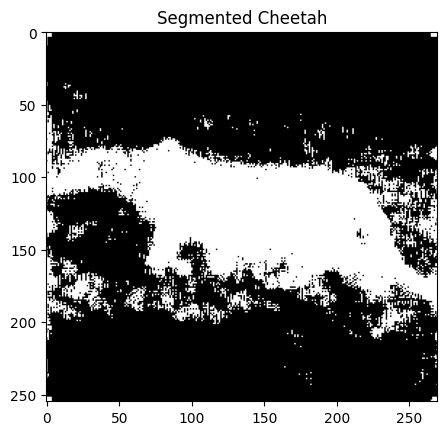

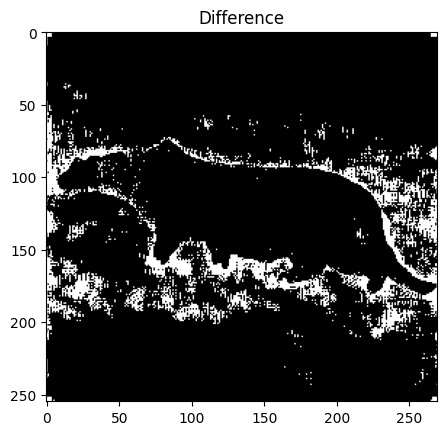

8 feature error:  0.10309368191721133


In [14]:
# only use the best 8 best_features
DCT_BG = TrainsampleDCT_BG[:, best_f]
DCT_FG = TrainsampleDCT_FG[:, best_f]

# Calculate the mean of cheetah and grass
mu_FG = np.sum(DCT_FG, axis=0) / DCT_FG.shape[0]
mu_BG = np.sum(DCT_BG, axis=0) / DCT_BG.shape[0]

# Calculate the covariance matrix of cheetah and grass
cov_FG = (DCT_FG - mu_FG).T@(DCT_FG - mu_FG) / DCT_FG.shape[0]
cov_BG = (DCT_BG - mu_BG).T@(DCT_BG - mu_BG) / DCT_BG.shape[0]

# Set the size of the grid to 8x8
grid_size = 8

# Set the padding size to 4
padding = 4

# Get the dimensions of the image
height, width = cheetah.shape

# Calculate the new dimensions for the padded image
padded_height = height + 2 * padding
padded_width = width + 2 * padding

# Create a new image to hold the padded image
result_img = np.random.randint(0, 1, size=(height + 2 * padding, width + 2 * padding), dtype=np.int16)

# # Copy the original image into the padded image
result_img[padding:padding+height, padding:padding+width] = cheetah

# Create an empty array to hold the segmented cheetah
segmented_cheetah = np.zeros((height, width), dtype=np.float64)
cov_BG = np.array(cov_BG,dtype=np.float64)
cov_FG = np.array(cov_FG,dtype=np.float64)
inv_cov_FG = np.linalg.pinv(cov_FG)
inv_cov_BG = np.linalg.pinv(cov_BG)
det_cov_FG = np.linalg.det(cov_FG)
det_cov_BG = np.linalg.det(cov_BG)


# Define a function to calculate the outcome for a given 8x8 grid
def outcome(grid):
    # Initialize an array to hold the DCT coefficients
    dc = 64*[0]
    grid = np.array(grid, dtype=np.float128)
    # Calculate the DCT of the grid
    dct_result = dct(dct(grid, axis=0, norm='ortho'), axis=1, norm='ortho')
    
    # Reorder the DCT coefficients using the zigzag pattern
    for row in range(8):
        for e in range(8):
            dc[sig_pattern[row][e]] = dct_result[row][e]
    # only use the best 8 best_features
    dc = np.array(dc)[best_f]
    dc = np.array(dc, dtype=np.float128)
    a = np.array(dc - mu_FG)
    b = np.array(dc - mu_BG)

    # Calculate the log likelihood of cheetah and grass
    posterior_FG = -32 * np.log(2*np.pi) - np.log(det_cov_FG)/2 - (a@inv_cov_FG@(a).T)/2 + np.log(Pcheetah)
    posterior_BG = -32 * np.log(2*np.pi) -np.log(det_cov_BG)/2 - (b@inv_cov_BG@(b).T)/2 + np.log(Pgrass)
    # bias the posterior 
    
    if posterior_FG > posterior_BG:
        return 1
    else:
        return 0
    

# Loop over each pixel in the image
for row in range(height):
    for col in range(width):
        
        # Extract the 8x8 grid centered at the current pixel
        grid = result_img[row:row +grid_size, col:col + grid_size]
       
        # Calculate the decision for the grid
        scalar_value = outcome(grid)

        # Store the decision in the segmented cheetah array
        segmented_cheetah[row, col] = scalar_value
        

# Display the segmented cheetah and the ground truth
plt.imshow(segmented_cheetah, cmap='gray')
plt.title('Segmented Cheetah')
plt.show()

# calculate the difference between the segmented cheetah and the ground truth
diff = np.abs(segmented_cheetah - cheetah_mask)
plt.imshow(diff, cmap='gray')
plt.title('Difference')
plt.show()
# calculating the error
e8 = np.sum(diff)/(height*width)
print('8 feature error: ', e8)


### Solution
Based on both the visual results and the error it is clear that the segmentation created with only 8 features preformed vastly better than the image with all the features. ie(E=10% for 8 features vs E=45% for 64 features) This is due to the remaining 56 features negativly affecting the results. Likely due to them introducing a random association for which class they belong to. Their in creating a random noise or bias on the overall decision rule for the guassian. 